In [1]:
# import necessary libararies 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 
sns.set()

In [2]:
# load dataset 
airb = pd.read_csv('Desktop/Airbnb_Open_Data.csv')

C:\Users\OJO Timilehin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
airb.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [4]:
# check shape 
airb.shape

(102599, 26)

In [5]:
# Check number of null values 
airb.isnull().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [30]:
# percentage of null values 
null_val = round(airb.isnull().sum()*100 / len(airb), 2)
null_val.sort_values(ascending = False)

license                           100.00
house_rules                        50.81
last review                        15.49
reviews per month                  15.48
country                             0.52
availability 365                    0.44
host name                           0.40
minimum nights                      0.40
review rate number                  0.32
calculated host listings count      0.31
host_identity_verified              0.28
service fee                         0.27
NAME                                0.24
price                               0.24
Construction year                   0.21
number of reviews                   0.18
country code                        0.13
instant_bookable                    0.10
cancellation_policy                 0.07
neighbourhood group                 0.03
neighbourhood                       0.02
long                                0.01
lat                                 0.01
id                                  0.00
host id         

In [33]:
# drop the 'license' column 
airb.drop('license', axis = 'columns', inplace = True)

### House rules

In [35]:
# replace null values in 'house_rules' column with 'House rules not available' 
airb['house_rules'].fillna('House Rules Not Available', inplace = True)

In [115]:
# change string case to lower 
airb['house_rules'] = airb['house_rules'].str.lower()

In [37]:
pd.set_option('display.max_columns', None)

In [66]:
airb.isnull().sum()

id                                    0
NAME                                250
host id                               0
host_identity_verified              289
host name                           406
neighbourhood group                  29
neighbourhood                        16
lat                                   8
long                                  8
instant_bookable                    105
cancellation_policy                  76
room type                             0
Construction year                   214
price                               247
service fee                         273
minimum nights                      409
number of reviews                   183
last review                       15893
reviews per month                 15879
review rate number                  326
calculated host listings count      319
availability 365                    448
house_rules                           0
dtype: int64

In [48]:
# drop columns 
airb.drop(columns = ['country', 'country code'], inplace = True)

In [73]:
airb.shape

(102599, 23)

In [80]:
airb['price'].isnull().sum()

0

### Price

In [79]:
# drop rows with null price column 
airb.dropna(subset = ['price'], axis = 0, inplace = True)

In [57]:
# check dtype
airb.price.dtype

dtype('O')

In [64]:
# strip off the $ sign \
airb['price'] = airb['price'].str.replace(r'[^0-9]+', '') 

<ipython-input-64-4bbe306cd759>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  airb['price'] = airb['price'].str.replace(r'[^0-9]+', '')


In [82]:
# change data type to int 
airb['price'] = airb['price'].astype('int')

In [85]:
airb.price.dtype

dtype('int32')

In [92]:
airb.shape

(102352, 23)

In [93]:
# drop columns with significant geographical nulls
airb.dropna(subset = ['neighbourhood group', 'neighbourhood', 'lat', 'long'], axis = 0, inplace = True)

In [96]:
airb.isnull().sum()

id                                    0
NAME                                245
host id                               0
host_identity_verified              277
host name                           400
neighbourhood group                   0
neighbourhood                         0
lat                                   0
long                                  0
instant_bookable                     98
cancellation_policy                  69
room type                             0
Construction year                   204
price                                 0
service fee                         239
minimum nights                      407
number of reviews                   183
last review                       15862
reviews per month                 15849
review rate number                  324
calculated host listings count      319
availability 365                    436
house_rules                           0
dtype: int64

### Host identity verified 

In [97]:
airb.host_identity_verified.unique()

array(['unconfirmed', 'verified', nan], dtype=object)

In [99]:
# drop host_identity_verified rows with null values
airb.dropna(subset = ['host_identity_verified'], axis = 0, inplace = True)

In [104]:
# change 'unconfirmed' to 'unverified' 
airb['host_identity_verified'].replace({'unconfirmed':'unverified'}, inplace = True)

### Availability 365 

#### This reveals how often the listing is available

In [106]:
# drop null values 
airb.dropna(subset = ['availability 365'], axis = 0, inplace = True)

In [116]:
# change dtype to int 
airb['availability 365'] = airb['availability 365'].astype('int')

### Instant bookable and Cancellation policy 

#### These features are important in helping clients make a decision. Null values should be dropped

In [110]:
# drop null values 
airb.dropna(subset = ['instant_bookable', 'cancellation_policy'], axis = 0, inplace = True)

In [111]:
airb.isnull().sum()

id                                    0
NAME                                216
host id                               0
host_identity_verified                0
host name                           385
neighbourhood group                   0
neighbourhood                         0
lat                                   0
long                                  0
instant_bookable                      0
cancellation_policy                   0
room type                             0
Construction year                   168
price                                 0
service fee                         235
minimum nights                      369
number of reviews                   129
last review                       15545
reviews per month                 15539
review rate number                  284
calculated host listings count      310
availability 365                      0
house_rules                           0
dtype: int64

### Number of reviews and Last review 

In [118]:
# drop null rows 
airb.dropna(subset = ['number of reviews', 'last review'], axis = 0, inplace = True)

In [120]:
airb.shape

(85907, 23)

In [126]:
airb.isnull().sum()

id                                  0
NAME                              179
host id                             0
host_identity_verified              0
host name                         309
neighbourhood group                 0
neighbourhood                       0
lat                                 0
long                                0
instant_bookable                    0
cancellation_policy                 0
room type                           0
Construction year                   0
price                               0
service fee                       207
minimum nights                    307
number of reviews                   0
last review                         0
reviews per month                   6
review rate number                197
calculated host listings count      0
availability 365                    0
house_rules                         0
dtype: int64

In [125]:
# drop null rows 
airb.dropna(subset = ['Construction year', 'calculated host listings count'], axis = 0, inplace = True)

### Service fee

In [129]:
# remove $ sign 
airb['service fee'] = airb['service fee'].str.replace(r'[^0-9]+', '')

<ipython-input-129-ff5cb9ae741b>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  airb['service fee'] = airb['service fee'].str.replace(r'[^0-9]+', '')


In [130]:
airb['service fee'].dtype

dtype('O')

In [142]:
# change dtype to 'int'
airb['service fee'] = pd.to_numeric(airb['service fee'])

In [143]:
airb['service fee'].dtype

dtype('float64')

In [144]:
airb['service fee'].isnull().sum()

207

(array([8490., 8453., 8309., 8825., 8659., 8644., 8379., 8485., 8592.,
        8674.]),
 array([  50.,  165.,  280.,  395.,  510.,  625.,  740.,  855.,  970.,
        1085., 1200.]),
 <BarContainer object of 10 artists>)

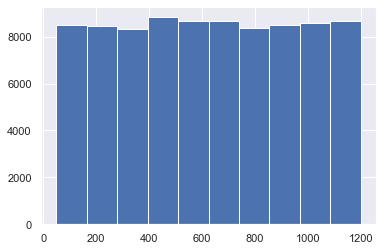

In [156]:
# price histogram
plt.hist(airb['price'])

##### since the price sitribution is uniform, fill null values with groupby mean of neighbourhood

In [148]:
airb['service fee'] = airb['service fee'].fillna(airb.groupby('neighbourhood')['service fee'].transform('mean'))

### Minimum nights

(array([8.5195e+04, 5.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.0000e+00, 5.6540e+02, 1.1298e+03, 1.6942e+03, 2.2586e+03,
        2.8230e+03, 3.3874e+03, 3.9518e+03, 4.5162e+03, 5.0806e+03,
        5.6450e+03]),
 <BarContainer object of 10 artists>)

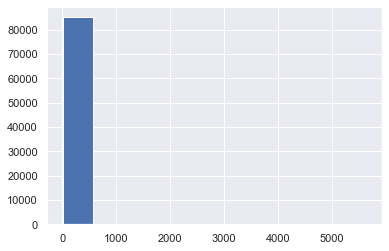

In [163]:
plt.hist(airb['minimum nights'])

##### It is most likely an error to have a negative value in minimum nights and a value > 30 days(1 Month)

In [164]:
# get rid of the negative sign
airb['minimum nights'] = airb['minimum nights'].abs()

(array([6.6595e+04, 5.3010e+03, 1.4380e+03, 8.7000e+01, 5.0600e+02,
        7.6700e+02, 9.7130e+03, 3.6000e+01, 2.3000e+01, 7.2000e+01]),
 array([ 1. ,  5.7, 10.4, 15.1, 19.8, 24.5, 29.2, 33.9, 38.6, 43.3, 48. ]),
 <BarContainer object of 10 artists>)

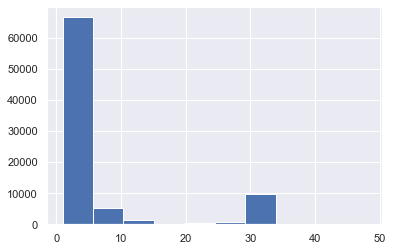

In [167]:
plt.hist(airb[airb['minimum nights'] < 50]['minimum nights'])

In [175]:
# replace rows with minimum nights > 30 with 30 
airb['minimum nights'].values[airb['minimum nights'] > 30] = 30

(array([5.5984e+04, 1.1887e+04, 3.3130e+03, 8.7500e+02, 1.2750e+03,
        7.6000e+01, 4.8100e+02, 3.6000e+01, 1.7000e+02, 1.1106e+04]),
 array([ 1. ,  3.9,  6.8,  9.7, 12.6, 15.5, 18.4, 21.3, 24.2, 27.1, 30. ]),
 <BarContainer object of 10 artists>)

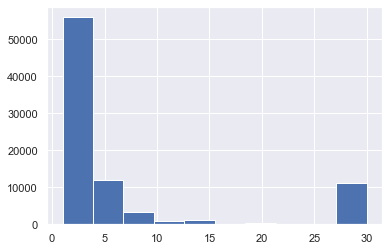

In [177]:
plt.hist(airb['minimum nights'])

##### Because the histogram is positively skewed, we will fill the null values with median rather than mean

In [184]:
# fill null values
airb['minimum nights'] = airb['minimum nights'].fillna(airb['minimum nights'].median())

In [186]:
airb.isnull().sum()

id                                  0
NAME                              179
host id                             0
host_identity_verified              0
host name                         309
neighbourhood group                 0
neighbourhood                       0
lat                                 0
long                                0
instant_bookable                    0
cancellation_policy                 0
room type                           0
Construction year                   0
price                               0
service fee                         0
minimum nights                      0
number of reviews                   0
last review                         0
reviews per month                   6
review rate number                197
calculated host listings count      0
availability 365                    0
house_rules                         0
dtype: int64

### NAME

In [188]:
# replace null values wqith 'No listing Name' 
airb['NAME'].fillna('No Listing Name', inplace = True)

In [189]:
airb.isnull().sum()

id                                  0
NAME                                0
host id                             0
host_identity_verified              0
host name                         309
neighbourhood group                 0
neighbourhood                       0
lat                                 0
long                                0
instant_bookable                    0
cancellation_policy                 0
room type                           0
Construction year                   0
price                               0
service fee                         0
minimum nights                      0
number of reviews                   0
last review                         0
reviews per month                   6
review rate number                197
calculated host listings count      0
availability 365                    0
house_rules                         0
dtype: int64

### Host Name

In [192]:
# replace null values wqith 'No Host Name' 
airb['host name'].fillna('No Host Name', inplace = True)

### Review rate number

In [206]:
airb['review rate number'].unique().to_list()

[4.0, 3.0, 5.0, nan, 2.0, 1.0]

In [197]:
airb['review rate number'].dtype

dtype('float64')

In [201]:
# change dtype to 'category'
airb['review rate number'] = airb['review rate number'].astype('category')

In [205]:
airb['review rate number'].isnull().sum()

197

In [210]:
# fill null value with mid rating(3)
airb['review rate number'].fillna(3.0, inplace = True)

In [211]:
airb.isnull().sum()

id                                0
NAME                              0
host id                           0
host_identity_verified            0
host name                         0
neighbourhood group               0
neighbourhood                     0
lat                               0
long                              0
instant_bookable                  0
cancellation_policy               0
room type                         0
Construction year                 0
price                             0
service fee                       0
minimum nights                    0
number of reviews                 0
last review                       0
reviews per month                 6
review rate number                0
calculated host listings count    0
availability 365                  0
house_rules                       0
dtype: int64

In [215]:
airb.to_csv('Desktop/Cleaned_AirBnB_Open_Data.csv', index = False)